 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [153]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [154]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_returns)
whale_data.set_index(pd.to_datetime(whale_data['Date'], infer_datetime_format=True), inplace=True)
whale_data.drop(columns=['Date'], inplace=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [155]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [156]:
# Drop nulls
whale_data = whale_data.dropna().copy()
whale_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [157]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_returns)
algo_data.set_index(pd.to_datetime(algo_data['Date'], infer_datetime_format=True), inplace=True)
algo_data.drop(columns=['Date'], inplace=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [158]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [159]:
# Drop nulls
algo_data = algo_data.dropna().copy()
algo_data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [160]:
# Reading S&P 500 Closing Prices
sp500_returns = Path("Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_returns)
sp500_data.set_index(pd.to_datetime(sp500_data['Date'], infer_datetime_format=True), inplace=True)
sp500_data.drop(columns=['Date'], inplace=True)
sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [161]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [162]:
# Fix Data Types
sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")
sp500_data["Close"] = sp500_data["Close"].astype("float")
sp500_data.dtypes

Close    float64
dtype: object

In [163]:
# Calculate Daily Returns
daily_returns = sp500_data.pct_change()
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [164]:
# Drop nulls
dr_data = daily_returns.dropna().copy()
dr_data

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [165]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["S&P 500"]
dr_data.columns = columns
dr_data.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [166]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
port_data = pd.concat([whale_data, algo_data, dr_data], axis="columns", join="inner")
port_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

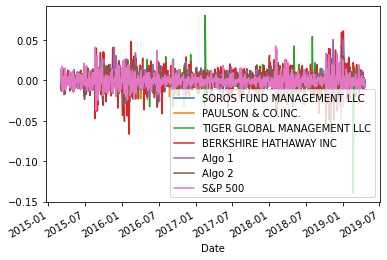

In [167]:
# Plot daily returns of all portfolios
port_data.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

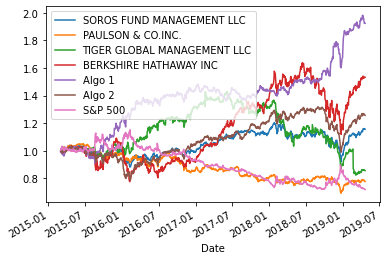

In [168]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + port_data).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

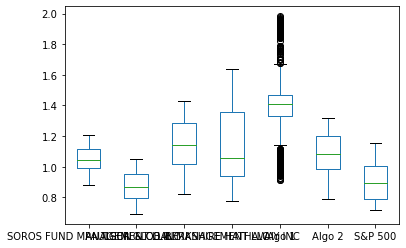

In [169]:
# Box plot to visually show risk
cumulative_returns.plot.box()

### Calculate Standard Deviations

In [170]:
# Calculate the daily standard deviations of all portfolios
daily_std = port_data.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [171]:
# Calculate the daily standard deviation of S&P 500
sp500_std = port_data["S&P 500"].std()
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

In [172]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

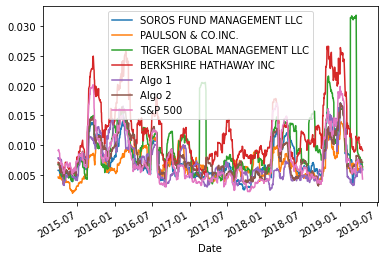

In [173]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
port_data.rolling(window=21).std().plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [174]:
# Calculate the correlation
correlation = port_data.corr()
correlation
# Display de correlation matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of AMZN Returns vs. S&P 500 Returns'}, xlabel='Date'>

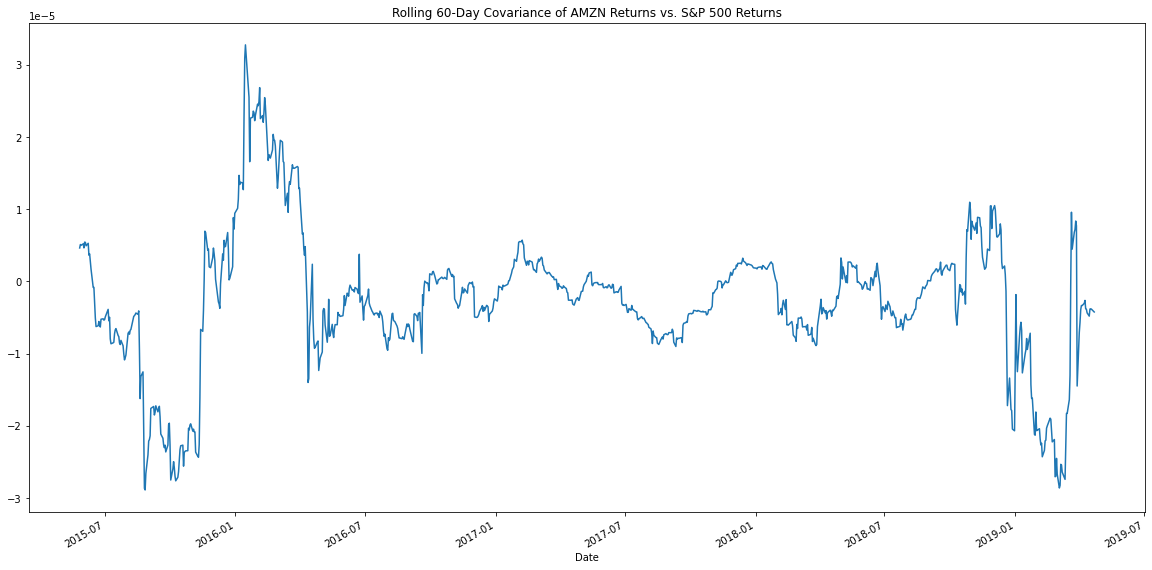

In [175]:
# Calculate covariance of a single portfolio
covariance = port_data['Algo 1'].cov(port_data['S&P 500'])
# Calculate variance of S&P 500
variance = port_data['S&P 500'].var()
# Computing beta
algo1_beta = covariance / variance
# Plot beta trend
rolling_covariance = port_data['Algo 1'].rolling(window=60).cov(port_data['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of AMZN Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [176]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [177]:
# Annualized Sharpe Ratios
sharpe_ratios = (port_data.mean() * 252) / (port_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

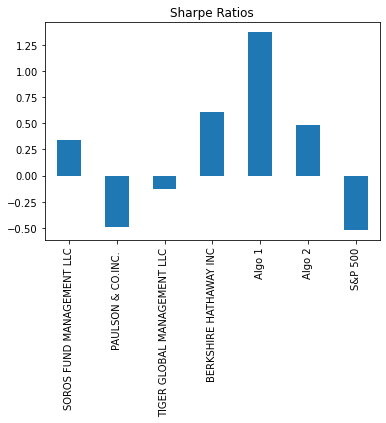

In [178]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [179]:
# Reading data from 1st stock
dbx_returns = Path("Resources/dbx_historical.csv")
dbx_data = pd.read_csv(dbx_returns)
dbx_data.set_index(pd.to_datetime(dbx_data['Date'], infer_datetime_format=True), inplace=True)
dbx_data.drop(columns=['Date'], inplace=True)
dbx_data.head()

,Close
Date,
2020-01-02 16:00:00,18.09
2020-01-03 16:00:00,18.00
2020-01-06 16:00:00,18.53
2020-01-07 16:00:00,18.53
2020-01-08 16:00:00,18.46


In [180]:
# Reading data from 2nd stock
play_returns = Path("Resources/play_historical.csv")
play_data = pd.read_csv(play_returns)
play_data.set_index(pd.to_datetime(play_data['Date'], infer_datetime_format=True), inplace=True)
play_data.drop(columns=['Date'], inplace=True)
play_data.head()

,Close
Date,
2020-01-02 16:00:00,40.68
2020-01-03 16:00:00,40.48
2020-01-06 16:00:00,40.38
2020-01-07 16:00:00,40.26
2020-01-08 16:00:00,41.00


In [181]:
# Reading data from 3rd stock
nio_returns = Path("Resources/nio_historical.csv")
nio_data = pd.read_csv(nio_returns)
nio_data.set_index(pd.to_datetime(nio_data['Date'], infer_datetime_format=True), inplace=True)
nio_data.drop(columns=['Date'], inplace=True)
nio_data.head()

,Close
Date,
2020-01-02 16:00:00,3.72
2020-01-03 16:00:00,3.83
2020-01-06 16:00:00,3.68
2020-01-07 16:00:00,3.24
2020-01-08 16:00:00,3.39


In [182]:
# Combine all stocks in a single DataFrame
port_data = pd.concat([dbx_data, play_data, nio_data], axis="columns", join="inner")
columns = ["Dropbox Inc", "Dave & Buster's Entertainment Inc", "Nio Inc"]
port_data.columns = columns
port_data.head()

,Dropbox Inc,Dave & Buster's Entertainment Inc,Nio Inc
Date,,,
2020-01-02 16:00:00,18.09,40.68,3.72
2020-01-03 16:00:00,18.00,40.48,3.83
2020-01-06 16:00:00,18.53,40.38,3.68
2020-01-07 16:00:00,18.53,40.26,3.24
2020-01-08 16:00:00,18.46,41.00,3.39


In [183]:
# Reset Date index


In [184]:
# Reorganize portfolio data by having a column per symbol


In [185]:
# Calculate daily returns
port_data = port_data.pct_change()
# Drop NAs
dr_data = port_data.dropna().copy()
# Display sample data
dr_data

,Dropbox Inc,Dave & Buster's Entertainment Inc,Nio Inc
Date,,,
2020-01-03 16:00:00,-0.004975,-0.004916,0.029570
2020-01-06 16:00:00,0.029444,-0.002470,-0.039164
2020-01-07 16:00:00,0.000000,-0.002972,-0.119565
2020-01-08 16:00:00,-0.003778,0.018381,0.046296
2020-01-09 16:00:00,-0.004875,0.004634,0.020649
...,...,...,...
2020-12-23 16:00:00,-0.010454,0.020665,-0.011980
2020-12-24 13:00:00,0.001625,0.015100,-0.026377
2020-12-28 16:00:00,-0.042596,-0.019270,-0.037361


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [186]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = dr_data.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2020-01-03 16:00:00    0.006559
2020-01-06 16:00:00   -0.004063
2020-01-07 16:00:00   -0.040846
2020-01-08 16:00:00    0.020300
2020-01-09 16:00:00    0.006803
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [187]:
# Join your returns DataFrame to the original returns DataFrame
port_data = pd.concat([dbx_data, play_data, nio_data, portfolio_returns], axis="columns", join="inner")
columns = ["Dropbox Inc", "Dave & Buster's Entertainment Inc", "Nio Inc", "Portfolio Returns"]
port_data.columns = columns
port_data.head()

,Dropbox Inc,Dave & Buster's Entertainment Inc,Nio Inc,Portfolio Returns
Date,,,,
2020-01-03 16:00:00,18.00,40.48,3.83,0.006559
2020-01-06 16:00:00,18.53,40.38,3.68,-0.004063
2020-01-07 16:00:00,18.53,40.26,3.24,-0.040846
2020-01-08 16:00:00,18.46,41.00,3.39,0.020300
2020-01-09 16:00:00,18.37,41.19,3.46,0.006803


In [188]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
port_data.isnull().sum()

Dropbox Inc                          0
Dave & Buster's Entertainment Inc    0
Nio Inc                              0
Portfolio Returns                    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [189]:
# Calculate the annualized `std`
annualized_std = port_data * np.sqrt(252)
annualized_std.head()

,Dropbox Inc,Dave & Buster's Entertainment Inc,Nio Inc,Portfolio Returns
Date,,,,
2020-01-03 16:00:00,285.741142,642.600078,60.799365,0.104128
2020-01-06 16:00:00,294.154631,641.012628,58.418189,-0.064506
2020-01-07 16:00:00,294.154631,639.107687,51.433405,-0.648405
2020-01-08 16:00:00,293.043415,650.854823,53.814582,0.322248
2020-01-09 16:00:00,291.614710,653.870979,54.925797,0.107987


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

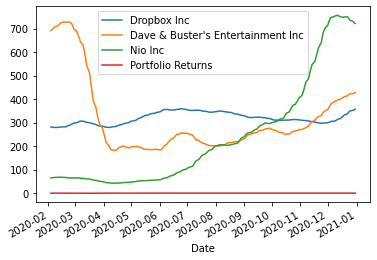

In [190]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
annualized_std.rolling(window=21).mean().plot()

### Calculate and plot the correlation

<AxesSubplot:>

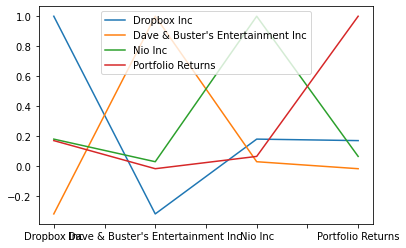

In [191]:
# Calculate and plot the correlation
correlation = annualized_std.corr()
correlation.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

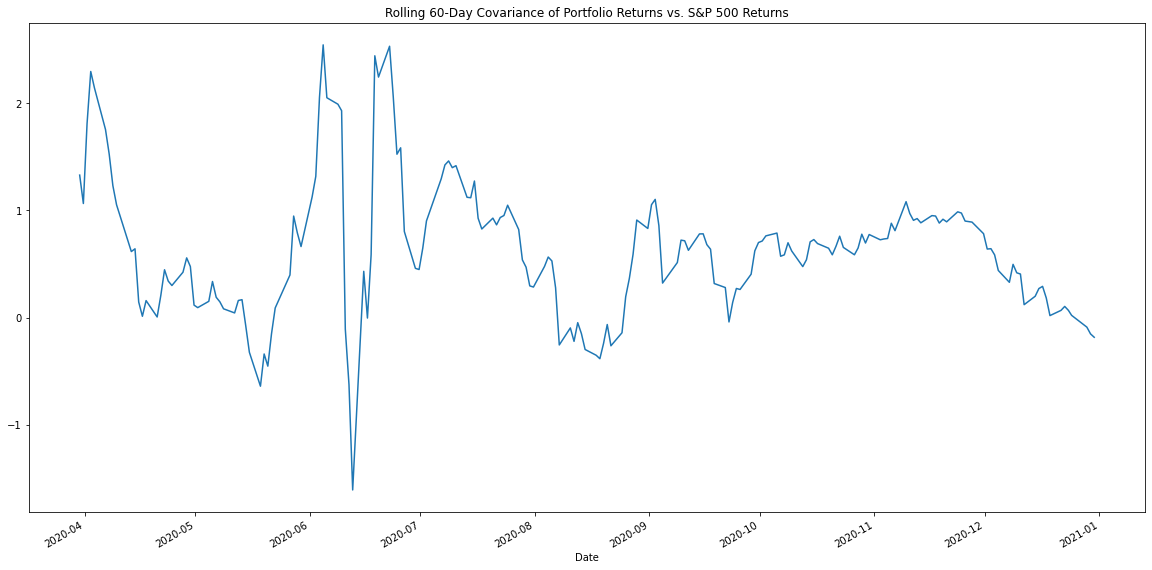

In [192]:
# Calculate and plot Beta
sp500_returns2020 = Path("Resources/sp500_historical2020.csv")
sp500_data2020 = pd.read_csv(sp500_returns2020)
sp500_data2020.set_index(pd.to_datetime(sp500_data2020['Date'], infer_datetime_format=True), inplace=True)
sp500_data2020.drop(columns=['Date'], inplace=True)

covariance = port_data['Portfolio Returns'].cov(sp500_data2020['Close'])

variance = sp500_data2020['Close'].var()

amzn_beta = covariance / variance

rolling_covariance = port_data['Portfolio Returns'].rolling(window=60).cov(sp500_data2020['Close'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Portfolio Returns vs. S&P 500 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [193]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (port_data.mean() * 252) / (port_data.std() * np.sqrt(252))
sharpe_ratios

Dropbox Inc                          167.254836
Dave & Buster's Entertainment Inc     29.885498
Nio Inc                               16.351900
Portfolio Returns                      1.868552
dtype: float64

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

My portfolio did relatively positive. It is very passive and that is how it relates to my style of investing.